<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">CAR EVALUATION</div>

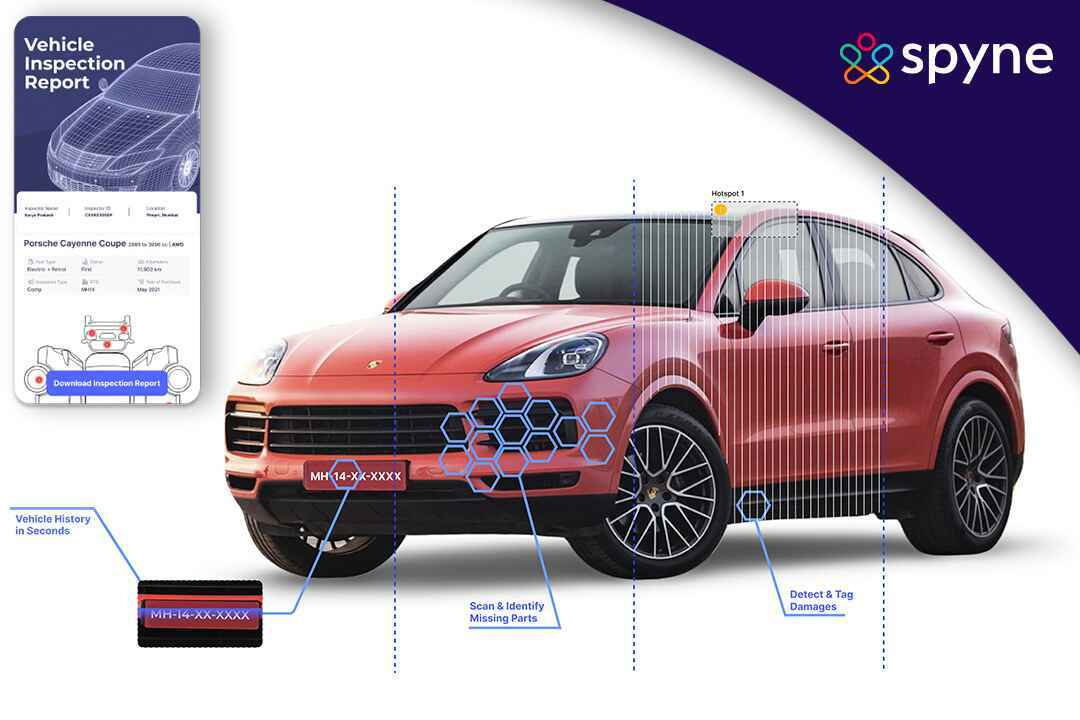


### **Introduction**


Car Evaluation Database was derived from a simple hierarchical
decision model originally developed for the demonstration of DEX
(M. Bohanec, V. Rajkovic: Expert system for decision
making. Sistemica 1(1), pp. 145-157, 1990.).

The aim of this model is to evaluate car's acceptability based on the following features:

  1. PRICE
      * "buying": The buying price
      * "maint": The price of the maintenance

  2. COMFORT
      * "doors": The number of doors
      * "persons":  The capacity in terms of number of persons to carry
      * "lug_boot": The size category of luggage boot
      * "safety": The estimated safety level of the car
   * ABOUT DATA FROM : https://archive.ics.uci.edu/dataset/19/car+evaluation

### **Importing Libraries**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.subplots as sp

### **Reading the dataset**

In [33]:
data = pd.read_csv("car_evaluation.csv")

In [34]:
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


### Adding colomns headers



“buying” : buying price

“maint” : price of the maintenance

“doors” : number of doors

“persons” : capacity in terms of persons to carry

“lug_boot” : the size of luggage boot

“safety” : estimated safety of the car

“class” : evaulation level (unacceptable, acceptable, good,
          very good)


In [35]:
column_names=["buying","maint","doors", "persons", "lug_boot", "safety", "class"]
data.columns = column_names
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


###  Exploratory Data Analysis(EDA) & Visualization
 <div style="padding:20px; 
                color:red;
                margin:10px;
                font-size:220%;
                text-align:center;
                display:fill;
                border-radius:20px;
                border-width: 5px;
                border-style: solid;
                border-color: blue;
                background-color:white;
                overflow:hidden;
                font-weight:1000">EDA & Visualization</div>

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [37]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [38]:
for col in data.columns:
  print(f"{col} :{data[col].unique()} : {data[col].nunique()}")

buying :['vhigh' 'high' 'med' 'low'] : 4
maint :['vhigh' 'high' 'med' 'low'] : 4
doors :['2' '3' '4' '5more'] : 4
persons :['2' '4' 'more'] : 3
lug_boot :['small' 'med' 'big'] : 3
safety :['med' 'high' 'low'] : 3
class :['unacc' 'acc' 'vgood' 'good'] : 4


In [39]:
for col in data.columns:
    count =data[col].value_counts()
    x = count.index
    y = count.values
    print(count)
    fig = sp.make_subplots(rows=1 , cols=2 ,specs=[[{'type':'xy'}, {'type':'domain'}]])
    fig.add_trace(go.Bar(x= x, y= y) , row=1 , col=1)
    fig.add_trace(go.Pie(labels=x, values=y), row=1, col=2)

    fig.update_layout(title_text=f"Distribution of {data[col].name}")
    fig.show()
    print("*"*50)
   

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64


**************************************************
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64


**************************************************
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64


**************************************************
persons
4       576
more    576
2       575
Name: count, dtype: int64


**************************************************
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64


**************************************************
safety
med     576
high    576
low     575
Name: count, dtype: int64


**************************************************
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


**************************************************


In [40]:
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
count_label = data["class"].value_counts()
x = count_label.index
y = count_label.values
fig = make_subplots(rows=1 , cols=2 ,specs=[[{'type':'xy'}, {'type':'domain'}]])
fig.add_trace(go.Bar(x= x, y= y) , row=1 , col=1)
fig.add_trace(go.Pie(labels=x, values=y), row=1, col=2)
fig.update_layout(title_text="Distribution of The Class Label")
fig.show()

* # Class acceptance based on the number of doors

In [41]:
import plotly.express as px

category_column = "class"
numerical_column = "doors"

# Assuming your data is stored in a pandas DataFrame named 'df'

fig = px.box(
    data_frame=data, # Changed 'data' to 'data_frame'
    x=category_column,
    y=numerical_column,
    color="class",  # Replace 'hue' with 'color' for Plotly Express
    color_discrete_sequence=["crimson", "aqua", "yellow", "teal"],  # Set color palette
)

fig.update_layout(
    title="Number of Doors by Class",
    xaxis_title="Class",
    yaxis_title="Number of Doors",
)

fig.show()

* The higher the number of doors the higher the level of acceptance

* # The acceptance class based on the number of persons

Text(0.5, 1.0, 'Class by Number of persons')

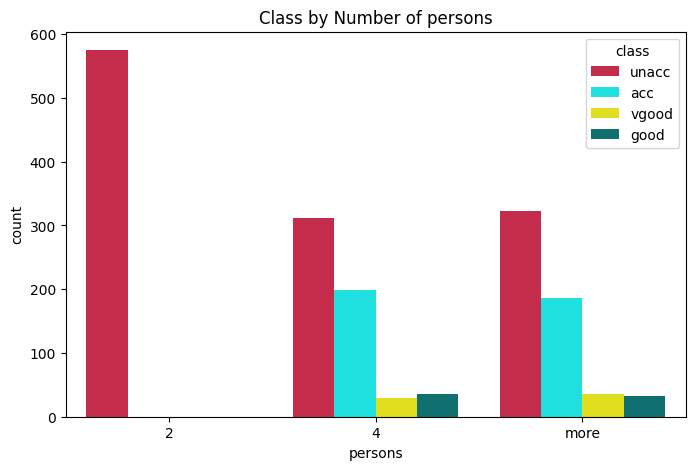

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(x ='persons',hue = 'class',data = data, palette=["crimson", "aqua", "yellow", "teal"] )
plt.title("Class by Number of persons")

* A car with a capacity less than two persons is considered unacceptable
* The higher the number of persons, the higher the acceptance class.

* # What is the number of persons based on the maintenance price

In [43]:
import plotly.express as px

# Assuming your data is stored in a pandas DataFrame named 'data'

fig = px.violin(
    data_frame=data,
    x="maint",
    y="persons",
    color="maint",  # Add color for better visualization
    color_discrete_sequence=["crimson", "aqua", "blue", "teal"]
)

fig.update_layout(
    title="Number of Persons by Maintenance Price",
    xaxis_title="Maintenance Price",
    yaxis_title="Number of Persons"
)

fig.show()


* The number of persons is not dependent on the maintenance cost

* # Class acceptance level in relation to the safety measure

In [44]:
import plotly.express as px

# Assuming your data is stored in a pandas DataFrame named 'data'

fig = px.histogram(
    data_frame=data,
    x="safety",
    color="class",
    barmode='group',  # Group bars by class
    color_discrete_sequence=["crimson", "aqua", "yellow", "teal"]
)

fig.update_layout(
    title="Class by Safety",
    xaxis_title="Safety",
    yaxis_title="Count"
)

fig.show()


* From the visualization, it is clear that low safety is completely cosindered unacceptable car class.
* The very goog car class is only found in the category high safety.

* # How is the acceptance class level affected by the maintenance price?

In [45]:
import plotly.express as px

# Assuming your data is stored in a pandas DataFrame named 'df'

fig = px.histogram(
    data_frame=data,
    x="maint",
    color="class",
    barmode='group',  # Group bars by class
    color_discrete_sequence=["crimson", "aqua", "yellow", "teal"]
)

fig.update_layout(
    title="Class by Maint Price",
    xaxis_title="Maint Price",
    yaxis_title="Count"
)

fig.show()


* The higher the maintenance price the lower the level of class acceptance

* # Which of the parameters affect the assessed condition the most .

In [46]:
import plotly.express as px
for i in data.columns[:-1]:
    fig = px.parallel_categories(data[[i, "class"]])
    fig.update_layout(title=data[i].name)

    fig.show()
   


* # We Calculate The Correlation Matrix

In [47]:
# import plotly.express as px
# import plotly.graph_objects as go
# corr_matrix = data.corr()
# fig = px.imshow(corr_matrix, text_auto=True, aspect="auto")
# fig.update_layout(
#     title='Correlation Heatmap',
#     xaxis_title="Features",
#     yaxis_title="Features"
# )
# fig.show()

### Pre-Processing
<div style="padding:20px; 
            color:red;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: blue;
            background-color:white;
            overflow:hidden;
            font-weight:500">Preprocessing</div>

In [48]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [49]:
for col in data.columns:
  print(f"{col} :{data[col].unique()} : {data[col].nunique()}")

buying :['vhigh' 'high' 'med' 'low'] : 4
maint :['vhigh' 'high' 'med' 'low'] : 4
doors :['2' '3' '4' '5more'] : 4
persons :['2' '4' 'more'] : 3
lug_boot :['small' 'med' 'big'] : 3
safety :['med' 'high' 'low'] : 3
class :['unacc' 'acc' 'vgood' 'good'] : 4


### Label Encoder

In [50]:
for col in data.columns:
  print(f"{col} :{data[col].unique()} : {data[col].nunique()}")

buying :['vhigh' 'high' 'med' 'low'] : 4
maint :['vhigh' 'high' 'med' 'low'] : 4
doors :['2' '3' '4' '5more'] : 4
persons :['2' '4' 'more'] : 3
lug_boot :['small' 'med' 'big'] : 3
safety :['med' 'high' 'low'] : 3
class :['unacc' 'acc' 'vgood' 'good'] : 4


In [51]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in data :
    data[data[col].name] = lb.fit_transform(data[data[col].name])

In [52]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


### Train & Test Split

In [53]:
x = data.drop(["class"] , axis=1)
y = data["class"]

In [54]:
x

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [55]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1722    1
1723    3
1724    2
1725    1
1726    3
Name: class, Length: 1727, dtype: int32

* # Processing Imbalanced Data

In [56]:

from sklearn.utils.class_weight import compute_class_weight

# Assuming your target variable is named 'y' and contains classes 0, 1, 2, 3
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

# Create a dictionary mapping class labels to their corresponding weights
class_weight_dict = dict(enumerate(class_weights))

print(class_weight_dict)
# from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTETomek
# smotetomek = SMOTETomek()
# x , y = smotetomek.fit_resample(x , y)
# y.value_counts()
# smote = SMOTE()
# x , y = smote.fit_resample(x,y)


{0: 1.1243489583333333, 1: 6.257246376811594, 2: 0.35711331679073616, 3: 6.642307692307693}


In [57]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=9)

In [58]:

#* Anther Way to Encode Data
# import category_encoders as ce
# encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
# x = encoder.fit_transform(x)
# y = encoder.fit_transform(y)

# Machine Learning MOdels
<div style="padding:20px; 
            color:red;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: blue;
            background-color:white;
            overflow:hidden;
            font-weight:500">Model Creation</div>

* # ML Classification Model Application 
    * model1 = Support Vector Machine (SVM)

    * model2 = K Neighbors Classifier (KNN)

    * model3 = Decision Tree Classifier

In [59]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier , plot_tree

model_1 = SVC(kernel="linear" , random_state=9)
model_2 = KNeighborsClassifier(n_neighbors=3)
model_3 = DecisionTreeClassifier(max_depth= None , random_state=9)

### SVC Model

In [60]:
svc = model_1.fit(x_train , y_train)
y_pred_train_svc = svc.predict(x_train )
y_pred_test_svc = svc.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
accuracy_train = accuracy_score(y_train , y_pred_train_svc)
accuracy_test = accuracy_score(y_test , y_pred_test_svc)
print(f"The Training Accuracy :{accuracy_train*100 :0.4} %")
print(f"The Testing Accuracy :{accuracy_test*100 :0.4} %")

The Training Accuracy :72.48 %
The Testing Accuracy :73.12 %


In [62]:
conf_matrix = confusion_matrix(y_test,y_pred_test)
conf_matrix

NameError: name 'y_pred_test' is not defined

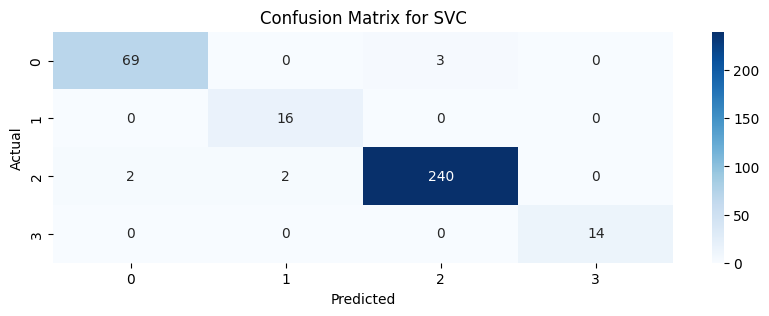

In [ ]:
plt.figure(figsize=(10,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC')
plt.show()

In [ ]:
import plotly.express as px

# Assuming your confusion matrix is stored in a variable named 'conf_matrix2'

fig = px.imshow(
    conf_matrix,
    text_auto=True,  # Display values in each cell
    aspect="auto",  # Adjust aspect ratio for clarity
    color_continuous_scale="Blues",  # Color scale
    facet_col_spacing=0.1  # Adjust spacing between subplots (optional)
)

fig.update_layout(
    title="Confusion Matrix for SVC",
    xaxis_title="Predicted",
    yaxis_title="Actual"
)

fig.update_xaxes(showticklabels=True)  # Ensure predicted labels are displayed

fig.show()


In [ ]:
print(classification_report(y_test, y_pred_test_svc))


              precision    recall  f1-score   support

           0       0.58      0.15      0.24        72
           1       0.00      0.00      0.00        16
           2       0.74      0.99      0.85       244
           3       0.00      0.00      0.00        14

    accuracy                           0.73       346
   macro avg       0.33      0.29      0.27       346
weighted avg       0.64      0.73      0.65       346



c:\Users\Right Click\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Right Click\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Right Click\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### KNN

In [ ]:
knn = model_2.fit(x_train , y_train)
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

In [ ]:
accuracy_train = accuracy_score(y_train , y_pred_train_knn)
accuracy_test = accuracy_score(y_test , y_pred_test_knn)
print(f"The Training Accuracy :{accuracy_train*100 :0.4} %")
print(f"The Testing Accuracy :{accuracy_test*100 :0.4} %")

The Training Accuracy :92.9 %
The Testing Accuracy :84.39 %


In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_test_knn)
conf_matrix

array([[ 47,   0,  25,   0],
       [  9,   6,   1,   0],
       [  9,   2, 233,   0],
       [  5,   2,   1,   6]], dtype=int64)

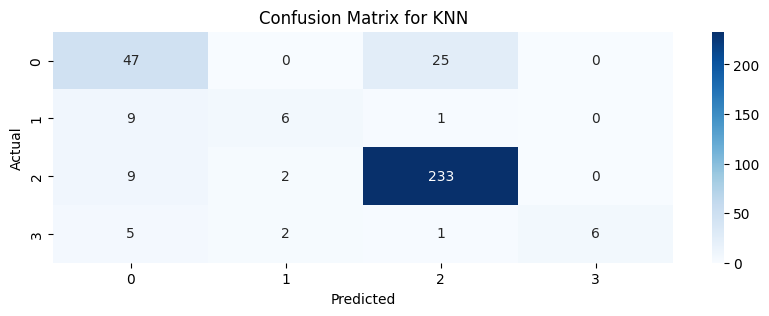

In [ ]:
plt.figure(figsize=(10,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

In [ ]:
import plotly.express as px

# Assuming your confusion matrix is stored in a variable named 'conf_matrix2'

fig = px.imshow(
    conf_matrix,
    text_auto=True,  # Display values in each cell
    aspect="auto",  # Adjust aspect ratio for clarity
    color_continuous_scale="Blues",  # Color scale
    facet_col_spacing=0.1  # Adjust spacing between subplots (optional)
)

fig.update_layout(
    title="Confusion Matrix for KNN",
    xaxis_title="Predicted",
    yaxis_title="Actual"
)

fig.update_xaxes(showticklabels=True)  # Ensure predicted labels are displayed

fig.show()


In [ ]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66        72
           1       0.60      0.38      0.46        16
           2       0.90      0.95      0.92       244
           3       1.00      0.43      0.60        14

    accuracy                           0.84       346
   macro avg       0.79      0.60      0.66       346
weighted avg       0.84      0.84      0.84       346



### Decision Tree

In [ ]:
DT = model_3.fit(x_train , y_train)
y_pred_train_td = DT.predict(x_train)
y_pred_test_td = DT.predict(x_test)


In [ ]:
accuracy_train = accuracy_score(y_train , y_pred_train_td)
accuracy_test = accuracy_score(y_test , y_pred_test_td)
print(f"The Training Accuracy :{accuracy_train*100 :0.4} %")
print(f"The Testing Accuracy :{accuracy_test*100 :0.4} %")

The Training Accuracy :100.0 %
The Testing Accuracy :97.98 %


In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_test_td)
conf_matrix

array([[ 69,   0,   3,   0],
       [  0,  16,   0,   0],
       [  2,   2, 240,   0],
       [  0,   0,   0,  14]], dtype=int64)

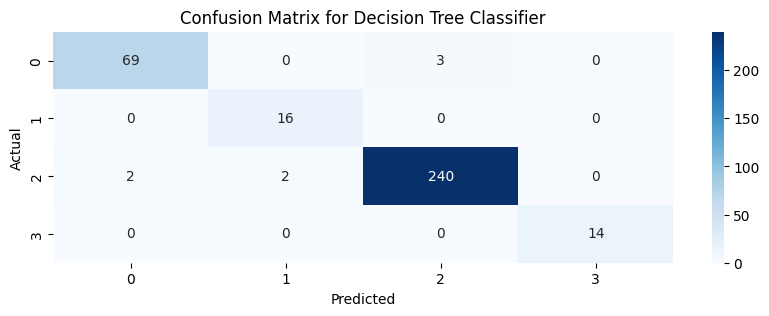

In [ ]:
plt.figure(figsize=(10,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [ ]:
import plotly.express as px

# Assuming your confusion matrix is stored in a variable named 'conf_matrix2'

fig = px.imshow(
    conf_matrix,
    text_auto=True,  # Display values in each cell
    aspect="auto",  # Adjust aspect ratio for clarity
    color_continuous_scale="Blues",  # Color scale
    facet_col_spacing=0.1  # Adjust spacing between subplots (optional)
)

fig.update_layout(
    title="Confusion Matrix for Decision Tree Classifier",
    xaxis_title="Predicted",
    yaxis_title="Actual"
)

fig.update_xaxes(showticklabels=True)  # Ensure predicted labels are displayed

fig.show()


In [ ]:
print(classification_report(y_test, y_pred_test_td))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.89      1.00      0.94        16
           2       0.99      0.98      0.99       244
           3       1.00      1.00      1.00        14

    accuracy                           0.98       346
   macro avg       0.96      0.99      0.97       346
weighted avg       0.98      0.98      0.98       346



In [ ]:
plt.figure(figsize=(15,8))
plot_tree(data, filled=True,  fontsize=10, feature_names=x_train.columns,
                              class_names=y_train)

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got       buying  maint  doors  persons  lug_boot  safety  class
0          3      3      0        0         2       2      2
1          3      3      0        0         2       0      2
2          3      3      0        0         1       1      2
3          3      3      0        0         1       2      2
4          3      3      0        0         1       0      2
...      ...    ...    ...      ...       ...     ...    ...
1722       1      1      3        2         1       2      1
1723       1      1      3        2         1       0      3
1724       1      1      3        2         0       1      2
1725       1      1      3        2         0       2      1
1726       1      1      3        2         0       0      3

[1727 rows x 7 columns] instead.

<Figure size 1500x800 with 0 Axes>

### Training and Testing Accuracy for Different Models

In [ ]:
import plotly.graph_objects as go

models = ['SVC', 'KNN', 'Decision Tree']
training_accuracy = [72.48, 92.9, 100.0]
testing_accuracy = [73.12, 84.39, 97.98]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=models,
    y=training_accuracy,
    name='Training Accuracy',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=models,
    y=testing_accuracy,
    name='Testing Accuracy',
    marker_color='green'
))

fig.update_layout(
    title='Training and Testing Accuracy for Different Models',
    xaxis_title='Models',
    yaxis_title='Accuracy (%)',
    barmode='group'
)

fig.show()
